
# Clustering Geospatial Data
I have created this notebook that demonstrates clustering geospatial data using methods such as K-Means, DBSCAN, Agglomerative Clustering, and Gaussian Mixture Model (GMM). Each method is evaluated using Silhouette Score, and the best method is chosen based on the highest score.

## Methods Implemented
1. **K-Means**
2. **DBSCAN**
3. **Agglomerative Clustering**
4. **Gaussian Mixture Model (GMM)**


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [3]:
file_path = 'ML Assignment Dataset.csv' 
data = pd.read_csv(file_path)

In [4]:
data[['Longitude', 'Latitude']] = data['Longitude;Latitude'].str.split(';', expand=True)
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')

In [5]:
data.dropna(inplace=True)

In [6]:
data.head()

,Longitude;Latitude,Longitude,Latitude
0,36.861544;-5.177747,36.861544,-5.177747
1,51.463766;5.392935,51.463766,5.392935
2,51.190492;4.453765,51.190492,4.453765
3,51.326247;6.085953,51.326247,6.085953
4,51.463766;5.392935,51.463766,5.392935


In [7]:
data_new_summary = data.describe()
data_new_summary

,Longitude,Latitude
count,9895.000000,9895.000000
mean,47.798423,4.763722
std,5.779548,8.706026
min,34.910655,-10.466312
25%,41.322100,-1.787456
50%,49.654149,0.742880
75%,52.661300,11.692222
max,59.450561,45.307594


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9895 entries, 0 to 9894
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Longitude;Latitude  9895 non-null   object 
 1   Longitude           9895 non-null   float64
 2   Latitude            9895 non-null   float64
dtypes: float64(2), object(1)
memory usage: 232.0+ KB


K-Means Silhouette Score: 0.52


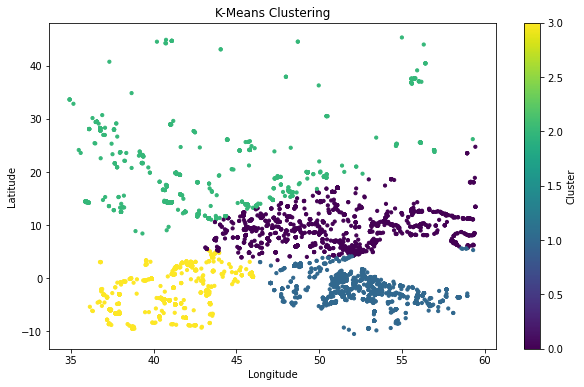

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data[['Longitude', 'Latitude']])
kmeans_silhouette = silhouette_score(data[['Longitude', 'Latitude']], data['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['KMeans_Cluster'], cmap='viridis', s=10)
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

DBSCAN Silhouette Score: 0.57


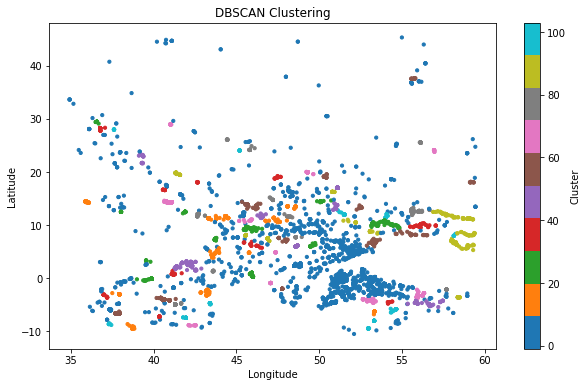

In [10]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data[['Longitude', 'Latitude']])
if len(set(data['DBSCAN_Cluster'])) > 1:
    dbscan_silhouette = silhouette_score(
        data[['Longitude', 'Latitude']][data['DBSCAN_Cluster'] != -1],
        data['DBSCAN_Cluster'][data['DBSCAN_Cluster'] != -1]
    )
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.2f}")
else:
    dbscan_silhouette = -1
    print("DBSCAN failed to form clusters or found only one cluster.")

plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['DBSCAN_Cluster'], cmap='tab10', s=10)
plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


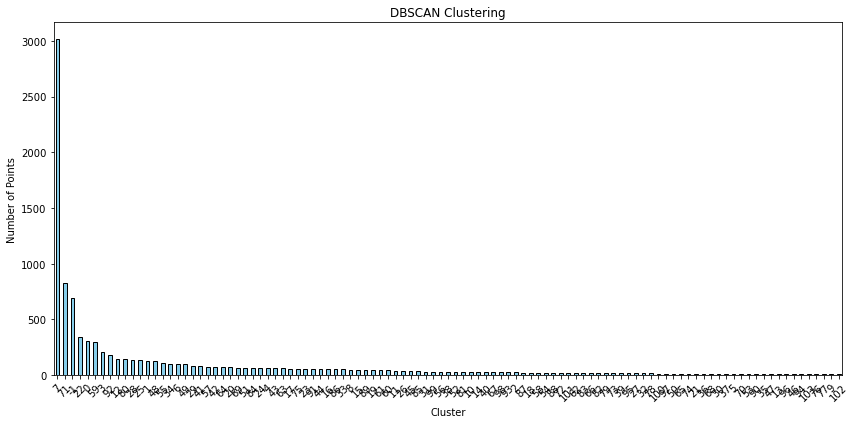

In [19]:
cluster_counts = data['DBSCAN_Cluster'].value_counts()
plt.figure(figsize=(12, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('DBSCAN Clustering')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Agglomerative Clustering Silhouette Score: 0.51


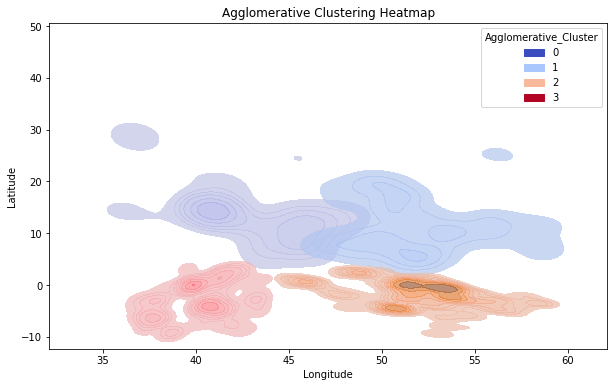

In [11]:
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
data['Agglomerative_Cluster'] = agglo.fit_predict(data[['Longitude', 'Latitude']])
agglo_silhouette = silhouette_score(data[['Longitude', 'Latitude']], data['Agglomerative_Cluster'])
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette:.2f}")

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Longitude', y='Latitude', hue='Agglomerative_Cluster', fill=True, palette='coolwarm', alpha=0.7)
plt.title('Agglomerative Clustering Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


GMM Silhouette Score: 0.49


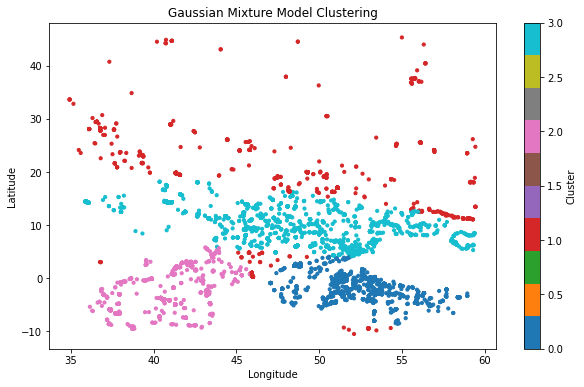

In [12]:
gmm = GaussianMixture(n_components=4, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(data[['Longitude', 'Latitude']])
gmm_silhouette = silhouette_score(data[['Longitude', 'Latitude']], data['GMM_Cluster'])
print(f"GMM Silhouette Score: {gmm_silhouette:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['GMM_Cluster'], cmap='tab10', s=10)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


In [13]:
scores = {
    'K-Means': kmeans_silhouette,
    'DBSCAN': dbscan_silhouette,
    'Agglomerative': agglo_silhouette,
    'GMM': gmm_silhouette
}
best_method = max(scores, key=scores.get)
print(f"The best clustering method is: {best_method} with a Silhouette Score of {scores[best_method]:.2f}.")


The best clustering method is: DBSCAN with a Silhouette Score of 0.57.
